In [5]:
import ALLM
import math
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [6]:
E_mu = 1.5
m_N = 0.94
m_pi = 0.14
a = 1.0 / 137.0
GeV_cm = 3.88 * 10.0**(-26.0)

#parameter dN/dt
rho = 1.0
N_A = 6.0 * 10**23
A = 1.0
Pb = 20 * 20 * 10


In [54]:

#j = Q2
j = 0.001
#k = y
k = 0.001
while j < 1.0:
    while k < 1.0:
        W = m_N **2 + 4 * m_N * E_mu * k - j
        E_gamma = (W **2 - m_N **2 + j) / (4 * m_N)
        Y = E_gamma / E_mu
        Q2_min = m_pi **2 * Y**2 / (1 - Y)
        x = j / (2 * m_N * E_gamma)
        #print(Q2_min)
        
        if(Q2_min < j and Q2_min > 0.0):
            #integrate
            #define sigma
            sigma_µN = lambda Q2, y: ( (4 * math.pi * a **2) / (y * Q2 **6 * (1 - x) ) ) * (Q2 **2 +4 * m_N **2 * x **2) * ((1 - y) * (1 - Q2_min / Q2) + y **2 / 2) * ALLM.allm_f2(x, j)
            val, err = integrate.dblquad(sigma_µN, Q2_min, j , lambda y: k, lambda y: k + 0.1)
            sigma = val * GeV_cm
            yokojiku.append(k)
            tatejiku.append(j)
            zjiku.append(sigma)
            print("1 loop")
            print(tatejiku)
            print(yokojiku)
            print(zjiku)
        k += 0.01
        
    j += 0.01


1 loop
[0.001]
[0.001]
[1.7148661246719269e-19]
1 loop
[0.001, 0.001]
[0.001, 0.011]
[1.7148661246719269e-19, 1.8823020785380072e-22]
1 loop
[0.001, 0.001, 0.001]
[0.001, 0.011, 0.020999999999999998]
[1.7148661246719269e-19, 1.8823020785380072e-22, 3.069756568504352e-26]
1 loop
[0.001, 0.001, 0.001, 0.001]
[0.001, 0.011, 0.020999999999999998, 0.031]
[1.7148661246719269e-19, 1.8823020785380072e-22, 3.069756568504352e-26, 2.9725365686564673e-27]
1 loop
[0.001, 0.001, 0.001, 0.001, 0.001]
[0.001, 0.011, 0.020999999999999998, 0.031, 0.041]
[1.7148661246719269e-19, 1.8823020785380072e-22, 3.069756568504352e-26, 2.9725365686564673e-27, 7.77770372298268e-28]
1 loop
[0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
[0.001, 0.011, 0.020999999999999998, 0.031, 0.041, 0.051000000000000004]
[1.7148661246719269e-19, 1.8823020785380072e-22, 3.069756568504352e-26, 2.9725365686564673e-27, 7.77770372298268e-28, 2.6901689445547022e-28]
1 loop
[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
[0.001, 0.011, 0.0

In [31]:
?plt.pcolormesh

ValueError: not enough values to unpack (expected 2, got 1)

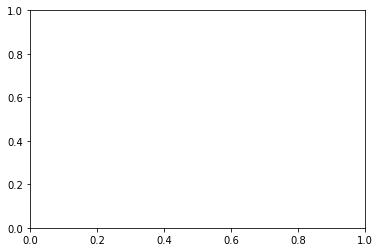

In [37]:
yokojiku, tatejiku = np.mgrid[0.001:1.0:0.1, 0.001:1.0:0.1]

fig, ax = plt.subplots()
im = ax.pcolormesh(yokojiku, tatejiku, np.array(zjiku), cmap='inferno',vmin=10**-32,vmax=10**-28)
ax.set_xlabel("y")
ax.set_ylabel("Q^2")
cbar = fig.colorbar(im)
cbar.set_label("sigma [cm^2]")
plt.show()

#ax.savefig('Q^2_dNdt.png', bbox_inches="tight", pad_inches=0.05)
plt.show()
print("ok")
np.savetxt("2Dhist-array.txt", H[0], fmt = "%s")
print("unti")

In [55]:
yokojiku

[0.001,
 0.011,
 0.020999999999999998,
 0.031,
 0.041,
 0.051000000000000004,
 0.061000000000000006,
 0.07100000000000001,
 0.081,
 0.091]

In [60]:
tatejiku

[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]

In [57]:
np.array(zjiku).shape

(10,)

In [58]:
zjiku

[1.7148661246719269e-19,
 1.8823020785380072e-22,
 3.069756568504352e-26,
 2.9725365686564673e-27,
 7.77770372298268e-28,
 2.6901689445547022e-28,
 1.0395103391877944e-28,
 4.0903823063647914e-29,
 1.4485187441274833e-29,
 2.8697616298950448e-30]

In [65]:
def Q2_min(y):
    return m_pi **2 * y**2 / (1 - y) 

def f(Q2_par, y_par):
    W = m_N **2 + 4 * m_N * E_mu * y_par - Q2_par
    E_gamma = (W **2 - m_N **2 + Q2_par) / (4 * m_N)
    x = Q2_par / (2 * m_N * E_gamma)
    flag = Q2_min(y_par) < Q2_par
    #Q2_min(y_par) *= flag
    Q2_par *= flag
    sigma_µN = lambda y, Q2: ( (4 * math.pi * a **2) / (y * Q2 **6 * (1 - x) ) ) * (Q2 **2 +4 * m_N **2 * x **2) * ((1 - y) * (1 - Q2_min / Q2) + y **2 / 2) * ALLM.allm_f2(x, Q2)
    var, err = integrate.dblquad(sigma_µN, y_par, y_par + 0.3, lambda Q2:Q2_min(y_par), lambda Q2:Q2_par)
    
    return var

In [66]:
X = np.arange(0.001, 1.0, 0.01)
Y = np.arange(0.001, 1.0 ,0.01)

In [67]:
plt.plot(X, Y, f(X, Y) * GeV_cm, 'g-')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

NameError: name 'x' is not defined

In [115]:
temp_Z = f(0.5, 0.5)

In [126]:
print(temp_Z * GeV_cm)

9.546716300523467e-26


ValueError: not enough values to unpack (expected 2, got 0)

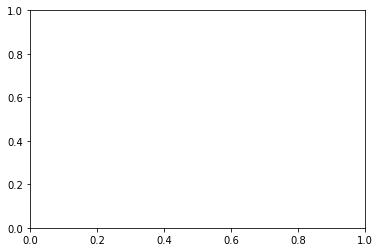

In [128]:
fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, Z, cmap='inferno',vmin=1.0 * 10**-32,vmax=1.0 * 10**-25)
ax.set_xlabel("y")
ax.set_ylabel("Q^2")
cbar = fig.colorbar(im)
cbar.set_label("sigma [cm^2]")
plt.show()

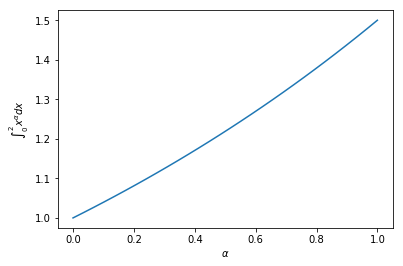

In [46]:
from scipy.integrate import quad_vec
>>> import matplotlib.pyplot as plt
>>> alpha = np.linspace(0.0, 2.0, num=30)
>>> f = lambda x: x**alpha
>>> x0, x1 = 0, 2
>>> y, err = quad_vec(f, x0, x1)
>>> plt.plot(alpha, y)
>>> plt.xlabel(r"$\alpha$")
>>> plt.ylabel(r"$\int_{0}^{2} x^\alpha dx$")
>>> plt.show()

2.09556


TypeError: scatter() got multiple values for argument 's'

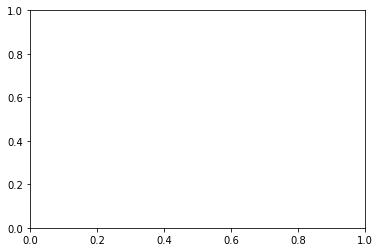

In [73]:
import numpy as np
from matplotlib import pyplot as plt
 
 
def is_inner(x, y, z):
    """
    円の内側かどうかを判定
    """
    return x ** 2 + y ** 2 + z** 2 < 1
 
 
inner_points_cnt = 0
all_points_cnt = 0
 
X, Y, Z = np.random.rand(3, 10 ** 5)
for x, y, z in zip(X, Y, Z):
    all_points_cnt += 1
    if is_inner(x, y, z):
        inner_points_cnt += 1
 
pi = (inner_points_cnt / all_points_cnt) * 4
 
# 計算結果を表示
print(pi)
 
# 以下matplotlibによる可視化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
# ランダムに配置した点
ax.scatter(X, Y, Z, s=2)
 
# x ** 2 + y ** 2 = 1 のグラフ
cx = np.linspace(0, 1, 100)
cy = np.sqrt(np.subtract(1, cx ** 2))
ax.plot(cx, cy, linewidth=3, color='r')
 
# 縦横比をそろえる
plt.gca().set_aspect('equal', adjustable='box')
 
# グラフの表示
plt.show()


4.67552


AttributeError: module 'matplotlib.pyplot' has no attribute 'zlim'

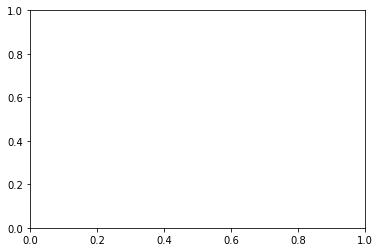

In [81]:
import random
import numpy as np
import matplotlib.pyplot as plt

total=100000
en=0

for i in range(0,total,1):
    a = random.uniform(-1,1)
    b = random.uniform(-1,1)
    c = random.uniform(-1,1)
    if a**2 + b**2 + c*2 < 1:
        en = en + 1

en_taiseki=8.0*en/total
print(str(en_taiseki))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.zlim(0, 1)
plt.show()